# 데이터 불러오기

In [231]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [232]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [233]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [234]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [235]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [236]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [237]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
df_sin_quarter

<ipython-input-237-aad5d98914bf>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,독서실,신촌동,169054586,18,1,0
1,2017-1,서비스,교육,스포츠강습,신촌동,795837623,23,1,0
2,2017-1,서비스,교육,예술학원,신촌동,1162571945,28,1,0
3,2017-1,서비스,교육,외국어학원,신촌동,3196308868,24,2,2
4,2017-1,서비스,교육,일반교습학원,신촌동,762815407,9,1,3
...,...,...,...,...,...,...,...,...,...
1339,2022-4,외식,식사류,패스트푸드점,신촌동,3057584360,83,0,4
1340,2022-4,외식,식사류,한식음식점,신촌동,29617724330,435,8,12
1341,2022-4,외식,주류,호프-간이주점,신촌동,7366806532,171,1,6
1342,2022-4,외식,카페/베이커리,제과점,신촌동,1302230221,48,3,2


# 한의원

In [238]:
# 한의원만 남기기
sin_khosp = df_sin_quarter[df_sin_quarter.업종명 == '한의원'].reset_index().drop('index', axis=1)
sin_khosp

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,의료,한의원,신촌동,2572796940,34,0,0
1,2017-2,서비스,의료,한의원,신촌동,2350859942,32,2,4
2,2017-3,서비스,의료,한의원,신촌동,2311074679,32,0,0
3,2017-4,서비스,의료,한의원,신촌동,1992458864,32,0,0
4,2018-1,서비스,의료,한의원,신촌동,2175477728,31,2,3
5,2018-2,서비스,의료,한의원,신촌동,1808210668,30,1,2
6,2018-3,서비스,의료,한의원,신촌동,1789092695,29,0,1
7,2018-4,서비스,의료,한의원,신촌동,1763286560,29,0,0
8,2019-1,서비스,의료,한의원,신촌동,1733838300,29,0,0
9,2019-2,서비스,의료,한의원,신촌동,1553058542,29,2,2


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [239]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_khosp['성장성'] = sin_khosp['분기당_매출_금액'] / sin_khosp['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_khosp['성장성'][0] = 1

sin_khosp

<ipython-input-239-591fa0f9e5ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_khosp['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,의료,한의원,신촌동,2572796940,34,0,0,1.000000
1,2017-2,서비스,의료,한의원,신촌동,2350859942,32,2,4,0.913737
2,2017-3,서비스,의료,한의원,신촌동,2311074679,32,0,0,0.983076
3,2017-4,서비스,의료,한의원,신촌동,1992458864,32,0,0,0.862135
4,2018-1,서비스,의료,한의원,신촌동,2175477728,31,2,3,1.091856
5,2018-2,서비스,의료,한의원,신촌동,1808210668,30,1,2,0.831179
6,2018-3,서비스,의료,한의원,신촌동,1789092695,29,0,1,0.989427
7,2018-4,서비스,의료,한의원,신촌동,1763286560,29,0,0,0.985576
8,2019-1,서비스,의료,한의원,신촌동,1733838300,29,0,0,0.983299
9,2019-2,서비스,의료,한의원,신촌동,1553058542,29,2,2,0.895734


In [240]:
# 개업률, 폐업률, 순점포증감률 추가

sin_khosp['개업률'] = (sin_khosp['개업점포수'] / sin_khosp['총 점포수']) * 100
sin_khosp['폐업률'] = (sin_khosp['폐업점포수'] / sin_khosp['총 점포수']) * 100
sin_khosp['순점포증감률'] = ((sin_khosp['개업점포수'] - sin_khosp['폐업점포수']) / sin_khosp['총 점포수']) * 100

# sin_khosp

In [241]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 한의원만 남기기
seo_khosp = df_seo_quarter[df_seo_quarter['업종명'] == '한의원'].reset_index()

################################################################################################################################################################################################

sin_khosp['시장성'] = (sin_khosp['분기당_매출_금액'] / sin_khosp['총 점포수']) - (seo_khosp['분기당_매출_금액'] / seo_khosp['총 점포수'])

sin_khosp = sin_khosp[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_khosp

<ipython-input-241-41bf1266c23f>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한의원,2572796940,1.000000,0.000000,4.844182e+06
1,2017-2,한의원,2350859942,0.913737,-6.250000,-6.630143e+05
2,2017-3,한의원,2311074679,0.983076,0.000000,3.020075e+06
3,2017-4,한의원,1992458864,0.862135,0.000000,6.552046e+05
4,2018-1,한의원,2175477728,1.091856,-3.225806,1.201844e+06
5,2018-2,한의원,1808210668,0.831179,-3.333333,-7.478338e+06
6,2018-3,한의원,1789092695,0.989427,-3.448276,-3.592306e+06
7,2018-4,한의원,1763286560,0.985576,0.000000,-5.432443e+06
8,2019-1,한의원,1733838300,0.983299,0.000000,-6.572703e+06
9,2019-2,한의원,1553058542,0.895734,0.000000,-1.455156e+07


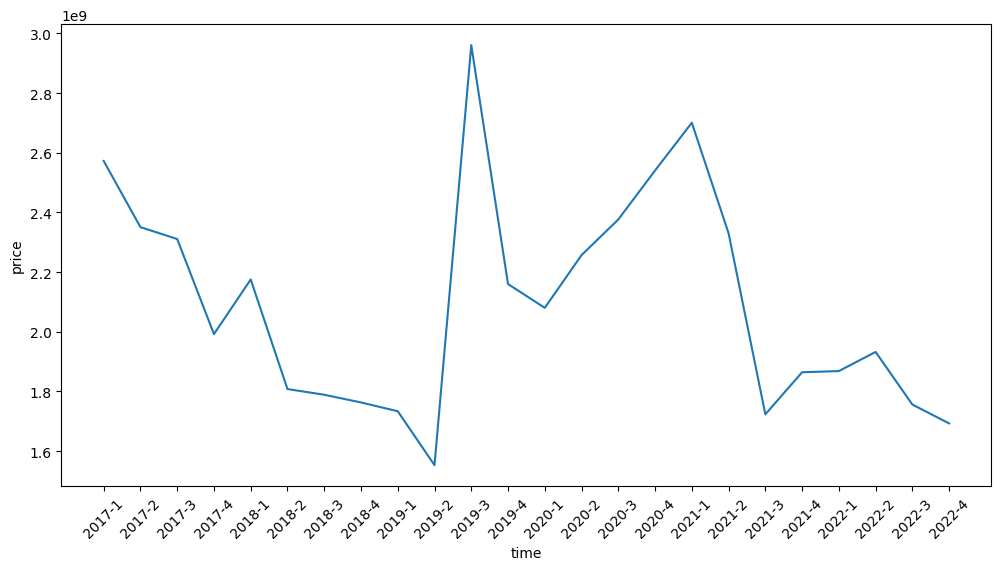

In [242]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_khosp['분기'], y=sin_khosp['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [243]:
### X / y 데이터 생성
X = sin_khosp[['성장성', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  4.844182e+06  0.000000
1   0.913737 -6.630143e+05 -6.250000
2   0.983076  3.020075e+06  0.000000
3   0.862135  6.552046e+05  0.000000
4   1.091856  1.201844e+06 -3.225806
5   0.831179 -7.478338e+06 -3.333333
6   0.989427 -3.592306e+06 -3.448276
7   0.985576 -5.432443e+06  0.000000
8   0.983299 -6.572703e+06  0.000000
9   0.895734 -1.455156e+07  0.000000
10  1.906419  2.230954e+07 -3.571429
11  0.729595  6.495221e+06  0.000000
12  0.963084  7.201903e+06  0.000000
13  1.084928  1.651735e+06  3.333333
14  1.052921  6.238210e+06  0.000000
15  1.069057  3.511702e+06  3.225806
16  1.063050  1.170237e+07  0.000000
17  0.862824 -5.258843e+06  0.000000
18  0.739598 -7.605671e+06  0.000000
19  1.081769 -4.099311e+06  3.125000
20  1.002160  1.240474e+06  0.000000
21  1.034306 -4.550770e+06  0.000000
22  0.908726 -5.600556e+06 -6.666667
23  0.964029 -6.002388e+06  0.000000
---------------------------------------------------------------------------

In [244]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [245]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [246]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [247]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15221579 0.24283073 0.        ]
 [0.19920924 0.23192948 0.66666667]]


In [248]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [249]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [250]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2007
Epoch 1: val_loss improved from inf to 0.30000, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.2007 - val_loss: 0.3000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1933
Epoch 2: val_loss improved from 0.30000 to 0.28718, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1933 - val_loss: 0.2872
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1862
Epoch 3: val_loss improved from 0.28718 to 0.27473, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.1862 - val_loss: 0.2747
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1793
Epoch 4: val_loss improved from 0.27473 to 0.26258, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.1793 - val_loss: 0.2626
Epoch 5/100
1/1 [================

In [251]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.45397887]
 [0.51903343]
 [0.45438075]
 [0.37259898]]


In [252]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.224080,0.453979
2022-2,0.269616,0.519033
2022-3,0.144309,0.454381
2022-4,0.099434,0.372599


In [253]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_khosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.224080,0.453979,1868500831,2.192135e+09,-323633825.0
2022-2,0.269616,0.519033,1932602280,2.283714e+09,-351111256.0
2022-3,0.144309,0.454381,1756206211,2.192700e+09,-436494205.0
2022-4,0.099434,0.372599,1693034038,2.077574e+09,-384540362.0


### 결과

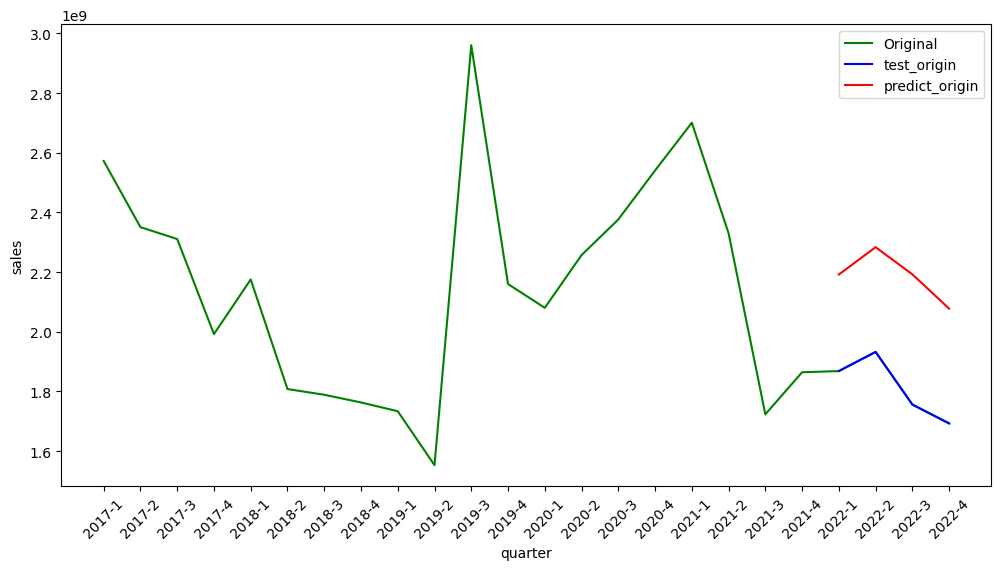

In [254]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [255]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.739449e+08
std      4.857043e+07
min     -4.364942e+08
25%     -3.975288e+08
50%     -3.678258e+08
75%     -3.442419e+08
max     -3.236338e+08
dtype: float64

In [256]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.3008398]]
--------------------------------------------------------------------------------
예측된 매출  : 1976557312.0 


## 23년 1분기 성장성 예측

In [257]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   2572796940  4.844182e+06  0.000000
1   2350859942 -6.630143e+05 -6.250000
2   2311074679  3.020075e+06  0.000000
3   1992458864  6.552046e+05  0.000000
4   2175477728  1.201844e+06 -3.225806
5   1808210668 -7.478338e+06 -3.333333
6   1789092695 -3.592306e+06 -3.448276
7   1763286560 -5.432443e+06  0.000000
8   1733838300 -6.572703e+06  0.000000
9   1553058542 -1.455156e+07  0.000000
10  2960780781  2.230954e+07 -3.571429
11  2160170523  6.495221e+06  0.000000
12  2080424623  7.201903e+06  0.000000
13  2257111012  1.651735e+06  3.333333
14  2376559987  6.238210e+06  0.000000
15  2540678371  3.511702e+06  3.225806
16  2700869193  1.170237e+07  0.000000
17  2330375170 -5.258843e+06  0.000000
18  1723541578 -7.605671e+06  0.000000
19  1864474027 -4.099311e+06  3.125000
20  1868500831  1.240474e+06  0.000000
21  1932602280 -4.550770e+06  0.000000
22  1756206211 -5.600556e+06 -6.666667
23  1693034038 -6.002388e+06  0.000000
-------------------------

In [258]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [259]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [260]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.14430948 0.24283073 0.        ]
 [0.09943403 0.23192948 0.66666667]]


In [261]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [262]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [263]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1418
Epoch 1: val_loss improved from inf to 0.06716, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1418 - val_loss: 0.0672
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1362
Epoch 2: val_loss improved from 0.06716 to 0.06093, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1362 - val_loss: 0.0609
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1308
Epoch 3: val_loss improved from 0.06093 to 0.05509, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.1308 - val_loss: 0.0551
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1256
Epoch 4: val_loss improved from 0.05509 to 0.04963, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1256 - val_loss: 0.0496
Epoch 5/100
1/1 [=================

In [264]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.1990592 ]
 [0.21388055]
 [0.19090845]
 [0.15822347]]


In [265]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.231610,0.199059
2022-2,0.258927,0.213881
2022-3,0.152216,0.190908
2022-4,0.199209,0.158223


In [266]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 3].values       # 성장성이 sin_khosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.231610,0.199059,1.002160,0.963853,0.038307
2022-2,0.258927,0.213881,1.034306,0.981295,0.053012
2022-3,0.152216,0.190908,0.908726,0.954261,-0.045534
2022-4,0.199209,0.158223,0.964029,0.915796,0.048233


### 결과

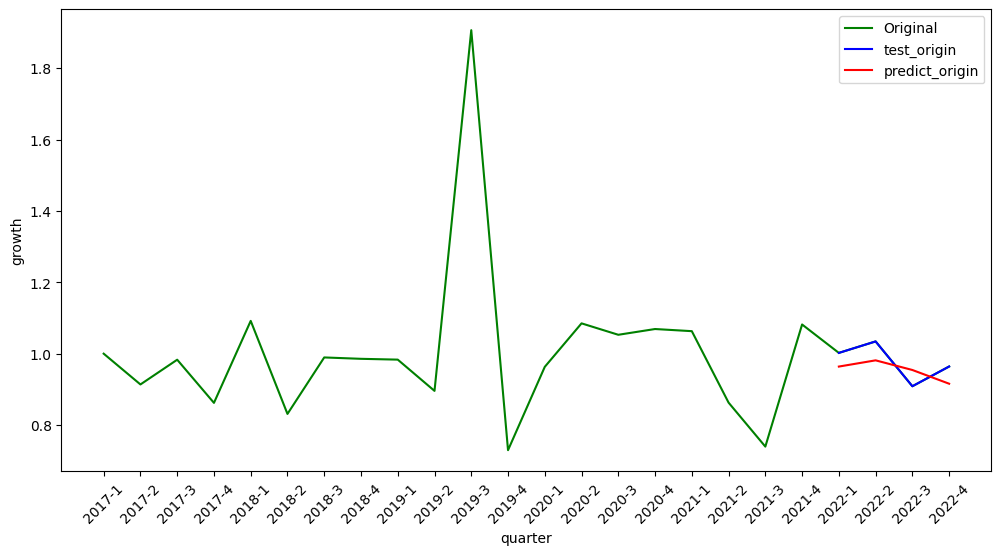

In [267]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [268]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.023504
std      0.046432
min     -0.045534
25%      0.017347
50%      0.043270
75%      0.049428
max      0.053012
dtype: float64

In [269]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 25ms/step
[[0.13237119]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.885372519493103 


## 23년 1분기 시장성 예측

In [270]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_khosp[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_khosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  2572796940  0.000000
1   0.913737  2350859942 -6.250000
2   0.983076  2311074679  0.000000
3   0.862135  1992458864  0.000000
4   1.091856  2175477728 -3.225806
5   0.831179  1808210668 -3.333333
6   0.989427  1789092695 -3.448276
7   0.985576  1763286560  0.000000
8   0.983299  1733838300  0.000000
9   0.895734  1553058542  0.000000
10  1.906419  2960780781 -3.571429
11  0.729595  2160170523  0.000000
12  0.963084  2080424623  0.000000
13  1.084928  2257111012  3.333333
14  1.052921  2376559987  0.000000
15  1.069057  2540678371  3.225806
16  1.063050  2700869193  0.000000
17  0.862824  2330375170  0.000000
18  0.739598  1723541578  0.000000
19  1.081769  1864474027  3.125000
20  1.002160  1868500831  0.000000
21  1.034306  1932602280  0.000000
22  0.908726  1756206211 -6.666667
23  0.964029  1693034038  0.000000
--------------------------------------------------------------------------------
             시장성
0   4.844182e+06
1  -6.6301

In [271]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [272]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [273]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15221579 0.14430948 0.        ]
 [0.19920924 0.09943403 0.66666667]]


In [274]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [275]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_39 (LSTM)              (None, 32)                12416     
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [276]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2301
Epoch 1: val_loss improved from inf to 0.24011, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2301 - val_loss: 0.2401
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2217
Epoch 2: val_loss improved from 0.24011 to 0.22850, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2217 - val_loss: 0.2285
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2136
Epoch 3: val_loss improved from 0.22850 to 0.21728, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2136 - val_loss: 0.2173
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2057
Epoch 4: val_loss improved from 0.21728 to 0.20639, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.2057 - val_loss: 0.2064
Epoch 5/100
1/1 [================

In [277]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.4045885 ]
 [0.45690235]
 [0.39913198]
 [0.33555603]]


In [278]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.428420,0.404588
2022-2,0.271310,0.456902
2022-3,0.242831,0.399132
2022-4,0.231929,0.335556


In [279]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 5].values       # 시장성이 sin_khosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.428420,0.404588,1.240474e+06,3.620136e+05,8.784607e+05
2022-2,0.271310,0.456902,-4.550770e+06,2.290360e+06,-6.841130e+06
2022-3,0.242831,0.399132,-5.600556e+06,1.608808e+05,-5.761436e+06
2022-4,0.231929,0.335556,-6.002388e+06,-2.182599e+06,-3.819789e+06


### 결과

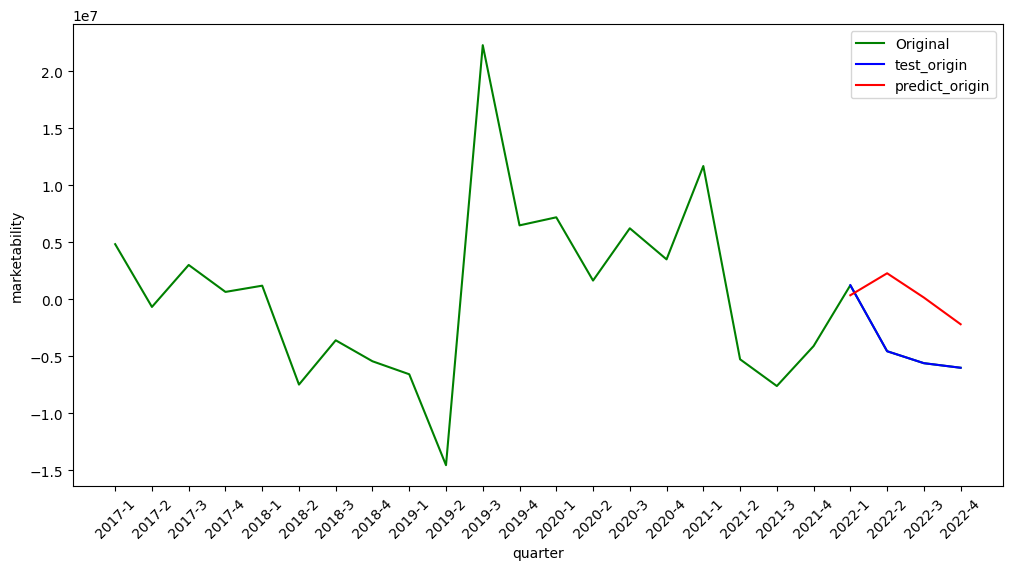

In [280]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [281]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.885974e+06
std      3.413431e+06
min     -6.841130e+06
25%     -6.031360e+06
50%     -4.790613e+06
75%     -2.645227e+06
max      8.784607e+05
dtype: float64

In [282]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 47ms/step
[[0.26735753]]
--------------------------------------------------------------------------------
예측된 시장성  : -4696470.5 


## 23년 1분기 순점포증감률 예측

In [283]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_khosp[['성장성', '분기당_매출_금액', '시장성']]
y = sin_khosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  2572796940  4.844182e+06
1   0.913737  2350859942 -6.630143e+05
2   0.983076  2311074679  3.020075e+06
3   0.862135  1992458864  6.552046e+05
4   1.091856  2175477728  1.201844e+06
5   0.831179  1808210668 -7.478338e+06
6   0.989427  1789092695 -3.592306e+06
7   0.985576  1763286560 -5.432443e+06
8   0.983299  1733838300 -6.572703e+06
9   0.895734  1553058542 -1.455156e+07
10  1.906419  2960780781  2.230954e+07
11  0.729595  2160170523  6.495221e+06
12  0.963084  2080424623  7.201903e+06
13  1.084928  2257111012  1.651735e+06
14  1.052921  2376559987  6.238210e+06
15  1.069057  2540678371  3.511702e+06
16  1.063050  2700869193  1.170237e+07
17  0.862824  2330375170 -5.258843e+06
18  0.739598  1723541578 -7.605671e+06
19  1.081769  1864474027 -4.099311e+06
20  1.002160  1868500831  1.240474e+06
21  1.034306  1932602280 -4.550770e+06
22  0.908726  1756206211 -5.600556e+06
23  0.964029  1693034038 -6.002388e+06
-------------------------

In [284]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [285]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [286]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15221579 0.14430948 0.24283073]
 [0.19920924 0.09943403 0.23192948]]


In [287]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [288]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [289]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3299
Epoch 1: val_loss improved from inf to 0.67306, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.3299 - val_loss: 0.6731
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3196
Epoch 2: val_loss improved from 0.67306 to 0.65481, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.3196 - val_loss: 0.6548
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3096
Epoch 3: val_loss improved from 0.65481 to 0.63700, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.3096 - val_loss: 0.6370
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2999
Epoch 4: val_loss improved from 0.63700 to 0.61956, saving model to stock_model.h5
1/1 [==============================] - 0s 133ms/step - loss: 0.2999 - val_loss: 0.6196
Epoch 5/100
1/1 [===============

In [290]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 876ms/step
[[0.44267005]
 [0.5452604 ]
 [0.5595311 ]
 [0.50663936]]


In [291]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.666667,0.442670
2022-2,0.666667,0.545260
2022-3,0.000000,0.559531
2022-4,0.666667,0.506639


In [292]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_khosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.666667,0.442670,0.000000,-2.239966,2.239966
2022-2,0.666667,0.545260,0.000000,-1.214062,1.214062
2022-3,0.000000,0.559531,-6.666667,-1.071356,-5.595311
2022-4,0.666667,0.506639,0.000000,-1.600273,1.600273


### 결과

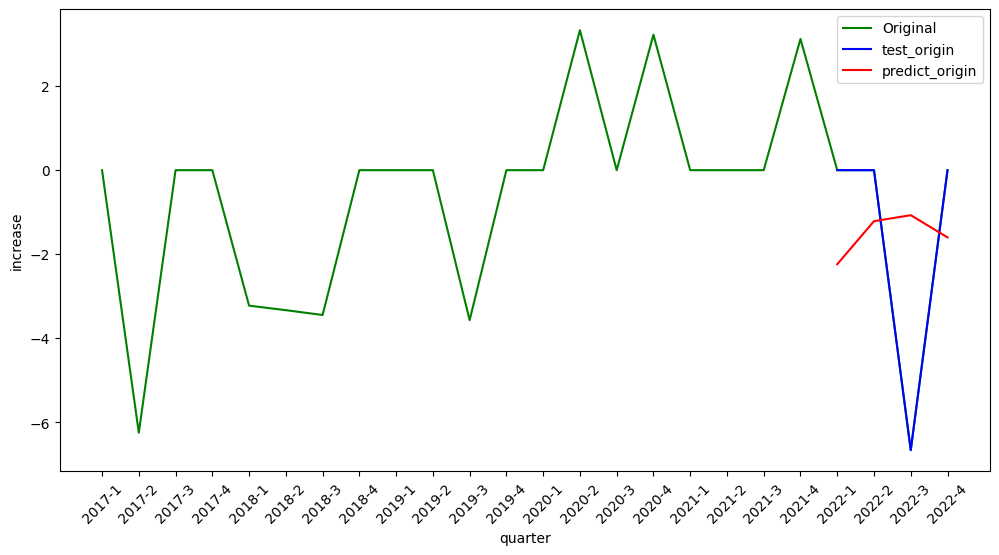

In [293]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [294]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.135252
std      3.664542
min     -5.595311
25%     -0.488281
50%      1.407168
75%      1.760196
max      2.239966
dtype: float64

In [295]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 27ms/step
[[0.4603026]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.063640832901001 


## 원본 데이터에 예측값 추가하기

In [296]:
print(sales)
print(growth)
print(marketability)
print(increase)

1976557300.0
0.8853725
-4696470.5
-2.0636408


In [297]:
sin_khosp.loc[24] = ['2023-1', '한의원', sales, growth, increase, marketability]

<ipython-input-297-5b738ad0e8b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_khosp.loc[24] = ['2023-1', '한의원', sales, growth, increase, marketability]


In [298]:
sin_khosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한의원,2.572797e+09,1.000000,0.000000,4.844182e+06
1,2017-2,한의원,2.350860e+09,0.913737,-6.250000,-6.630143e+05
2,2017-3,한의원,2.311075e+09,0.983076,0.000000,3.020075e+06
3,2017-4,한의원,1.992459e+09,0.862135,0.000000,6.552046e+05
4,2018-1,한의원,2.175478e+09,1.091856,-3.225806,1.201844e+06
5,2018-2,한의원,1.808211e+09,0.831179,-3.333333,-7.478338e+06
6,2018-3,한의원,1.789093e+09,0.989427,-3.448276,-3.592306e+06
7,2018-4,한의원,1.763287e+09,0.985576,0.000000,-5.432443e+06
8,2019-1,한의원,1.733838e+09,0.983299,0.000000,-6.572703e+06
9,2019-2,한의원,1.553059e+09,0.895734,0.000000,-1.455156e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [299]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_khosp[['성장성', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  4.844182e+06  0.000000
1   0.913737 -6.630143e+05 -6.250000
2   0.983076  3.020075e+06  0.000000
3   0.862135  6.552046e+05  0.000000
4   1.091856  1.201844e+06 -3.225806
5   0.831179 -7.478338e+06 -3.333333
6   0.989427 -3.592306e+06 -3.448276
7   0.985576 -5.432443e+06  0.000000
8   0.983299 -6.572703e+06  0.000000
9   0.895734 -1.455156e+07  0.000000
10  1.906419  2.230954e+07 -3.571429
11  0.729595  6.495221e+06  0.000000
12  0.963084  7.201903e+06  0.000000
13  1.084928  1.651735e+06  3.333333
14  1.052921  6.238210e+06  0.000000
15  1.069057  3.511702e+06  3.225806
16  1.063050  1.170237e+07  0.000000
17  0.862824 -5.258843e+06  0.000000
18  0.739598 -7.605671e+06  0.000000
19  1.081769 -4.099311e+06  3.125000
20  1.002160  1.240474e+06  0.000000
21  1.034306 -4.550770e+06  0.000000
22  0.908726 -5.600556e+06 -6.666667
23  0.964029 -6.002388e+06  0.000000
24  0.885373 -4.696470e+06 -2.063641
--------------------------------------

In [300]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [301]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.19920924 0.23192948 0.66666667]
 [0.13237118 0.26735754 0.46030258]]


In [302]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [303]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_43 (LSTM)              (None, 32)                12416     
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [304]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1982
Epoch 1: val_loss improved from inf to 0.28646, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1982 - val_loss: 0.2865
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1905
Epoch 2: val_loss improved from 0.28646 to 0.27434, saving model to stock_model.h5
1/1 [==============================] - 0s 118ms/step - loss: 0.1905 - val_loss: 0.2743
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1830
Epoch 3: val_loss improved from 0.27434 to 0.26260, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.1830 - val_loss: 0.2626
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1759
Epoch 4: val_loss improved from 0.26260 to 0.25118, saving model to stock_model.h5
1/1 [==============================] - 0s 144ms/step - loss: 0.1759 - val_loss: 0.2512
Epoch 5/100
1/1 [==============

In [305]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 842ms/step
[[0.5073168 ]
 [0.44599175]
 [0.36603165]
 [0.29764235]]


In [306]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.269616,0.507317
2022-3,0.144309,0.445992
2022-4,0.099434,0.366032
2023-1,0.300840,0.297642


In [307]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_khosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.269616,0.507317,1.932602e+09,2.267220e+09,-334617432.0
2022-3,0.144309,0.445992,1.756206e+09,2.180891e+09,-424684925.0
2022-4,0.099434,0.366032,1.693034e+09,2.068329e+09,-375295434.0
2023-1,0.300840,0.297642,1.976557e+09,1.972056e+09,4500992.0


In [308]:
df_test = df_test.reset_index()

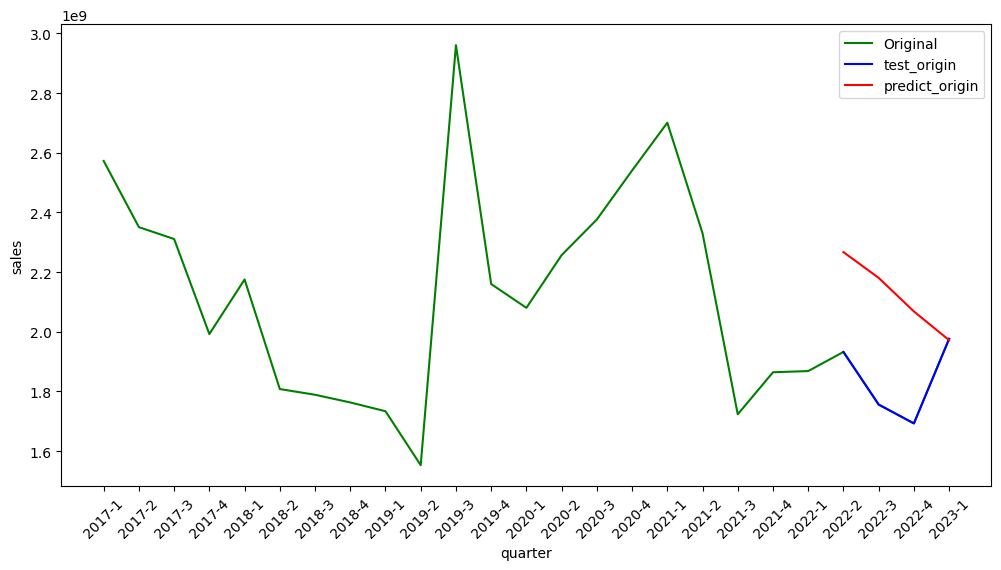

In [309]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [310]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -2.825242e+08
std      1.948618e+08
min     -4.246849e+08
25%     -3.876428e+08
50%     -3.549564e+08
75%     -2.498378e+08
max      4.500992e+06
dtype: float64

In [311]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 31ms/step
[[0.40321982]]
--------------------------------------------------------------------------------
예측된 매출  : 2120680064.0 


### 성장성

In [312]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.572797e+09  4.844182e+06  0.000000
1   2.350860e+09 -6.630143e+05 -6.250000
2   2.311075e+09  3.020075e+06  0.000000
3   1.992459e+09  6.552046e+05  0.000000
4   2.175478e+09  1.201844e+06 -3.225806
5   1.808211e+09 -7.478338e+06 -3.333333
6   1.789093e+09 -3.592306e+06 -3.448276
7   1.763287e+09 -5.432443e+06  0.000000
8   1.733838e+09 -6.572703e+06  0.000000
9   1.553059e+09 -1.455156e+07  0.000000
10  2.960781e+09  2.230954e+07 -3.571429
11  2.160171e+09  6.495221e+06  0.000000
12  2.080425e+09  7.201903e+06  0.000000
13  2.257111e+09  1.651735e+06  3.333333
14  2.376560e+09  6.238210e+06  0.000000
15  2.540678e+09  3.511702e+06  3.225806
16  2.700869e+09  1.170237e+07  0.000000
17  2.330375e+09 -5.258843e+06  0.000000
18  1.723542e+09 -7.605671e+06  0.000000
19  1.864474e+09 -4.099311e+06  3.125000
20  1.868501e+09  1.240474e+06  0.000000
21  1.932602e+09 -4.550770e+06  0.000000
22  1.756206e+09 -5.600556e+06 -6.666667
23  1.693034e+09

In [313]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [314]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.09943403 0.23192948 0.66666667]
 [0.30083972 0.26735754 0.46030258]]


In [315]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [316]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_45 (LSTM)              (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [317]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1342
Epoch 1: val_loss improved from inf to 0.06779, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.1342 - val_loss: 0.0678
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1285
Epoch 2: val_loss improved from 0.06779 to 0.06163, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1285 - val_loss: 0.0616
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1230
Epoch 3: val_loss improved from 0.06163 to 0.05584, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.1230 - val_loss: 0.0558
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1179
Epoch 4: val_loss improved from 0.05584 to 0.05043, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.1179 - val_loss: 0.0504
Epoch 5/100
1/1 [===============

In [318]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 841ms/step
[[0.22559229]
 [0.201945  ]
 [0.16732585]
 [0.14020818]]


In [319]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.258927,0.225592
2022-3,0.152216,0.201945
2022-4,0.199209,0.167326
2023-1,0.132371,0.140208


In [320]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 3].values       # 성장성이 sin_khosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.258927,0.225592,1.034306,0.995077,0.039229
2022-3,0.152216,0.201945,0.908726,0.967249,-0.058523
2022-4,0.199209,0.167326,0.964029,0.926508,0.037521
2023-1,0.132371,0.140208,0.885373,0.894595,-0.009223


In [321]:
df_test = df_test.reset_index()

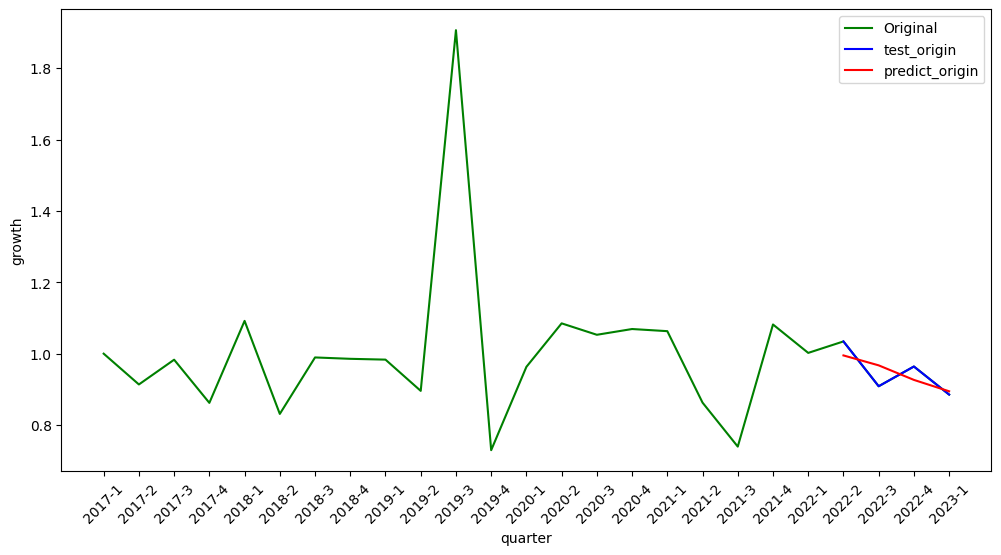

In [322]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [323]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.002251
std      0.046319
min     -0.058523
25%     -0.021548
50%      0.014149
75%      0.037948
max      0.039229
dtype: float64

In [324]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.18571505]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9481489062309265 


### 시장성

In [325]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_khosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.572797e+09  1.000000  0.000000
1   2.350860e+09  0.913737 -6.250000
2   2.311075e+09  0.983076  0.000000
3   1.992459e+09  0.862135  0.000000
4   2.175478e+09  1.091856 -3.225806
5   1.808211e+09  0.831179 -3.333333
6   1.789093e+09  0.989427 -3.448276
7   1.763287e+09  0.985576  0.000000
8   1.733838e+09  0.983299  0.000000
9   1.553059e+09  0.895734  0.000000
10  2.960781e+09  1.906419 -3.571429
11  2.160171e+09  0.729595  0.000000
12  2.080425e+09  0.963084  0.000000
13  2.257111e+09  1.084928  3.333333
14  2.376560e+09  1.052921  0.000000
15  2.540678e+09  1.069057  3.225806
16  2.700869e+09  1.063050  0.000000
17  2.330375e+09  0.862824  0.000000
18  1.723542e+09  0.739598  0.000000
19  1.864474e+09  1.081769  3.125000
20  1.868501e+09  1.002160  0.000000
21  1.932602e+09  1.034306  0.000000
22  1.756206e+09  0.908726 -6.666667
23  1.693034e+09  0.964029  0.000000
24  1.976557e+09  0.885373 -2.063641
--------------------------------------

In [326]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [327]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.09943403 0.19920924 0.66666667]
 [0.30083972 0.13237118 0.46030258]]


In [328]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [329]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_47 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [330]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2419
Epoch 1: val_loss improved from inf to 0.20840, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2419 - val_loss: 0.2084
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2329
Epoch 2: val_loss improved from 0.20840 to 0.19793, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.2329 - val_loss: 0.1979
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2242
Epoch 3: val_loss improved from 0.19793 to 0.18780, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.2242 - val_loss: 0.1878
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2158
Epoch 4: val_loss improved from 0.18780 to 0.17800, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.2158 - val_loss: 0.1780
Epoch 5/100
1/1 [==============

In [331]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 866ms/step
[[0.4020726 ]
 [0.35526052]
 [0.29977295]
 [0.24051495]]


In [332]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.271310,0.402073
2022-3,0.242831,0.355261
2022-4,0.231929,0.299773
2023-1,0.267358,0.240515


In [333]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 5].values       # 시장성이 sin_khosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.271310,0.402073,-4.550770e+06,2.692754e+05,-4.820045e+06
2022-3,0.242831,0.355261,-5.600556e+06,-1.456270e+06,-4.144286e+06
2022-4,0.231929,0.299773,-6.002388e+06,-3.501603e+06,-2.500785e+06
2023-1,0.267358,0.240515,-4.696470e+06,-5.685918e+06,9.894475e+05


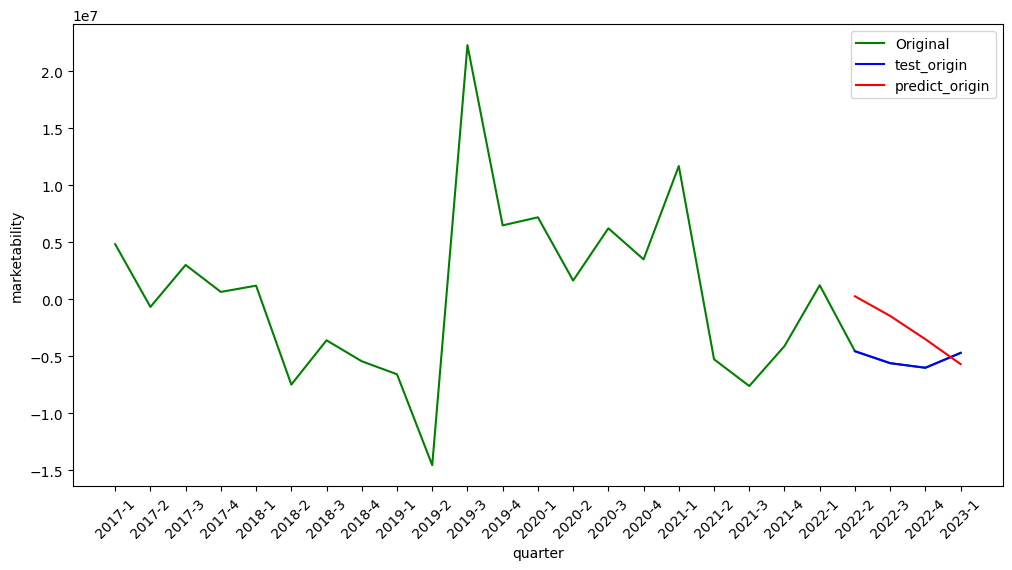

In [334]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [335]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -2.618917e+06
std      2.595250e+06
min     -4.820045e+06
25%     -4.313226e+06
50%     -3.322536e+06
75%     -1.628227e+06
max      9.894475e+05
dtype: float64

In [336]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.32537958]]
--------------------------------------------------------------------------------
예측된 시장성  : -2557714.25 


### 순점포증감률

In [337]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '성장성', '시장성']]
y = sin_khosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.572797e+09  1.000000  4.844182e+06
1   2.350860e+09  0.913737 -6.630143e+05
2   2.311075e+09  0.983076  3.020075e+06
3   1.992459e+09  0.862135  6.552046e+05
4   2.175478e+09  1.091856  1.201844e+06
5   1.808211e+09  0.831179 -7.478338e+06
6   1.789093e+09  0.989427 -3.592306e+06
7   1.763287e+09  0.985576 -5.432443e+06
8   1.733838e+09  0.983299 -6.572703e+06
9   1.553059e+09  0.895734 -1.455156e+07
10  2.960781e+09  1.906419  2.230954e+07
11  2.160171e+09  0.729595  6.495221e+06
12  2.080425e+09  0.963084  7.201903e+06
13  2.257111e+09  1.084928  1.651735e+06
14  2.376560e+09  1.052921  6.238210e+06
15  2.540678e+09  1.069057  3.511702e+06
16  2.700869e+09  1.063050  1.170237e+07
17  2.330375e+09  0.862824 -5.258843e+06
18  1.723542e+09  0.739598 -7.605671e+06
19  1.864474e+09  1.081769 -4.099311e+06
20  1.868501e+09  1.002160  1.240474e+06
21  1.932602e+09  1.034306 -4.550770e+06
22  1.756206e+09  0.908726 -5.600556e+06
23  1.693034e+09

In [338]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [339]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.09943403 0.19920924 0.23192948]
 [0.30083972 0.13237118 0.26735754]]


In [340]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [341]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_49 (LSTM)              (None, 32)                12416     
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [342]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3410
Epoch 1: val_loss improved from inf to 0.65368, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.3410 - val_loss: 0.6537
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3299
Epoch 2: val_loss improved from 0.65368 to 0.63731, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.3299 - val_loss: 0.6373
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3191
Epoch 3: val_loss improved from 0.63731 to 0.62127, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.3191 - val_loss: 0.6213
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3085
Epoch 4: val_loss improved from 0.62127 to 0.60549, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.3085 - val_loss: 0.6055
Epoch 5/100
1/1 [=================

In [343]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 898ms/step
[[0.5360285]
 [0.551619 ]
 [0.5032644]
 [0.4548512]]


In [344]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.666667,0.536029
2022-3,0.000000,0.551619
2022-4,0.666667,0.503264
2023-1,0.460303,0.454851


In [345]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_khosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.666667,0.536029,0.000000,-1.306382,1.306382
2022-3,0.000000,0.551619,-6.666667,-1.150477,-5.516190
2022-4,0.666667,0.503264,0.000000,-1.634022,1.634022
2023-1,0.460303,0.454851,-2.063641,-2.118155,0.054514


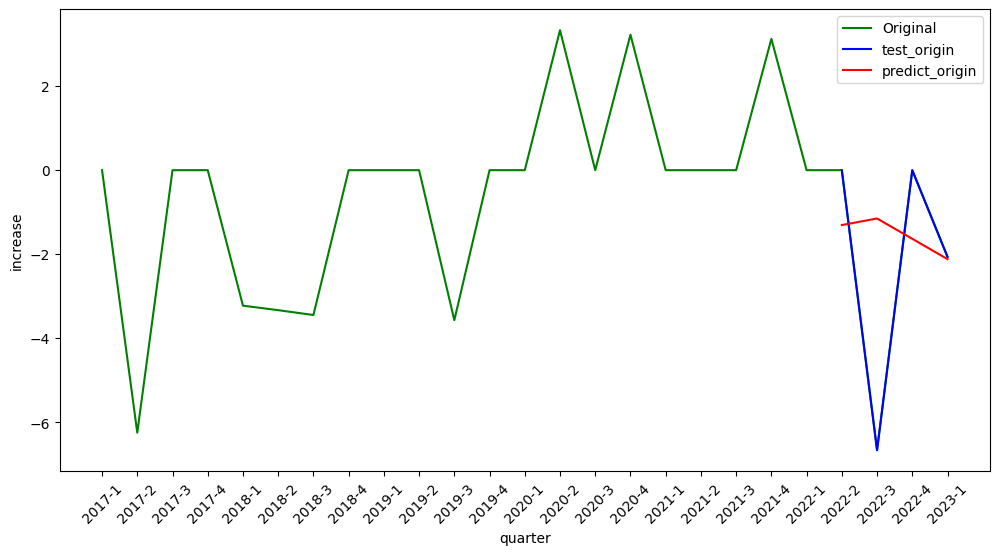

In [346]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [347]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.630318
std      3.327601
min     -5.516190
25%     -1.338162
50%      0.680448
75%      1.388292
max      1.634022
dtype: float64

In [348]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 33ms/step
[[0.46812505]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.985416293144226 


### 추가


In [349]:
sin_khosp.loc[25] = ['2023-2', '한의원', sales, growth, increase, marketability]

<ipython-input-349-eef5462ffbe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_khosp.loc[25] = ['2023-2', '한의원', sales, growth, increase, marketability]


In [350]:
sin_khosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한의원,2.572797e+09,1.000000,0.000000,4.844182e+06
1,2017-2,한의원,2.350860e+09,0.913737,-6.250000,-6.630143e+05
2,2017-3,한의원,2.311075e+09,0.983076,0.000000,3.020075e+06
3,2017-4,한의원,1.992459e+09,0.862135,0.000000,6.552046e+05
4,2018-1,한의원,2.175478e+09,1.091856,-3.225806,1.201844e+06
5,2018-2,한의원,1.808211e+09,0.831179,-3.333333,-7.478338e+06
6,2018-3,한의원,1.789093e+09,0.989427,-3.448276,-3.592306e+06
7,2018-4,한의원,1.763287e+09,0.985576,0.000000,-5.432443e+06
8,2019-1,한의원,1.733838e+09,0.983299,0.000000,-6.572703e+06
9,2019-2,한의원,1.553059e+09,0.895734,0.000000,-1.455156e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [351]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_khosp[['성장성', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  4.844182e+06  0.000000
1   0.913737 -6.630143e+05 -6.250000
2   0.983076  3.020075e+06  0.000000
3   0.862135  6.552046e+05  0.000000
4   1.091856  1.201844e+06 -3.225806
5   0.831179 -7.478338e+06 -3.333333
6   0.989427 -3.592306e+06 -3.448276
7   0.985576 -5.432443e+06  0.000000
8   0.983299 -6.572703e+06  0.000000
9   0.895734 -1.455156e+07  0.000000
10  1.906419  2.230954e+07 -3.571429
11  0.729595  6.495221e+06  0.000000
12  0.963084  7.201903e+06  0.000000
13  1.084928  1.651735e+06  3.333333
14  1.052921  6.238210e+06  0.000000
15  1.069057  3.511702e+06  3.225806
16  1.063050  1.170237e+07  0.000000
17  0.862824 -5.258843e+06  0.000000
18  0.739598 -7.605671e+06  0.000000
19  1.081769 -4.099311e+06  3.125000
20  1.002160  1.240474e+06  0.000000
21  1.034306 -4.550770e+06  0.000000
22  0.908726 -5.600556e+06 -6.666667
23  0.964029 -6.002388e+06  0.000000
24  0.885373 -4.696470e+06 -2.063641
25  0.948149 -2.557714e+06 -1.985416
-

In [352]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [353]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.13237118 0.26735754 0.46030258]
 [0.18571506 0.32537958 0.46812504]]


In [354]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [355]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_51 (LSTM)              (None, 32)                12416     
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [356]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2051
Epoch 1: val_loss improved from inf to 0.26267, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2051 - val_loss: 0.2627
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1970
Epoch 2: val_loss improved from 0.26267 to 0.25118, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.1970 - val_loss: 0.2512
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1892
Epoch 3: val_loss improved from 0.25118 to 0.24006, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.1892 - val_loss: 0.2401
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1817
Epoch 4: val_loss improved from 0.24006 to 0.22925, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.1817 - val_loss: 0.2293
Epoch 5/100
1/1 [==============

In [357]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 965ms/step
[[0.4132382 ]
 [0.3390737 ]
 [0.2779005 ]
 [0.37353486]]


In [358]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.144309,0.413238
2022-4,0.099434,0.339074
2023-1,0.300840,0.277900
2023-2,0.403220,0.373535


In [359]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_khosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.144309,0.413238,1.756206e+09,2.134783e+09,-378576893.0
2022-4,0.099434,0.339074,1.693034e+09,2.030380e+09,-337345994.0
2023-1,0.300840,0.277900,1.976557e+09,1.944265e+09,32292096.0
2023-2,0.403220,0.373535,2.120680e+09,2.078892e+09,41788160.0


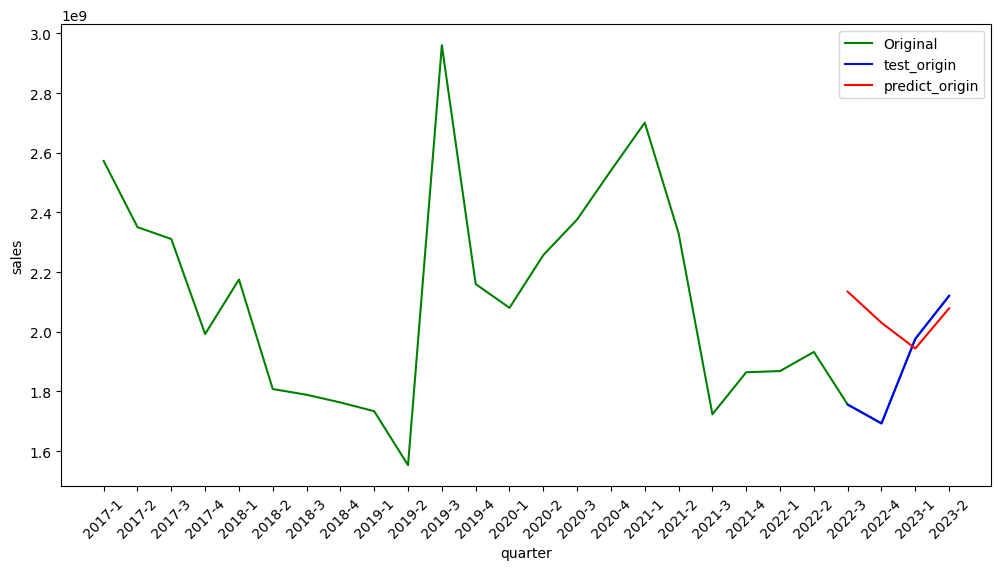

In [360]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [361]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.604607e+08
std      2.287075e+08
min     -3.785769e+08
25%     -3.476537e+08
50%     -1.525269e+08
75%      3.466611e+07
max      4.178816e+07
dtype: float64

In [362]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.34032047]]
--------------------------------------------------------------------------------
예측된 매출  : 2032135168.0 


### 성장성

In [363]:
X = sin_khosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.572797e+09  4.844182e+06  0.000000
1   2.350860e+09 -6.630143e+05 -6.250000
2   2.311075e+09  3.020075e+06  0.000000
3   1.992459e+09  6.552046e+05  0.000000
4   2.175478e+09  1.201844e+06 -3.225806
5   1.808211e+09 -7.478338e+06 -3.333333
6   1.789093e+09 -3.592306e+06 -3.448276
7   1.763287e+09 -5.432443e+06  0.000000
8   1.733838e+09 -6.572703e+06  0.000000
9   1.553059e+09 -1.455156e+07  0.000000
10  2.960781e+09  2.230954e+07 -3.571429
11  2.160171e+09  6.495221e+06  0.000000
12  2.080425e+09  7.201903e+06  0.000000
13  2.257111e+09  1.651735e+06  3.333333
14  2.376560e+09  6.238210e+06  0.000000
15  2.540678e+09  3.511702e+06  3.225806
16  2.700869e+09  1.170237e+07  0.000000
17  2.330375e+09 -5.258843e+06  0.000000
18  1.723542e+09 -7.605671e+06  0.000000
19  1.864474e+09 -4.099311e+06  3.125000
20  1.868501e+09  1.240474e+06  0.000000
21  1.932602e+09 -4.550770e+06  0.000000
22  1.756206e+09 -5.600556e+06 -6.666667
23  1.693034e+09

In [364]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [365]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.30083972 0.26735754 0.46030258]
 [0.40321983 0.32537958 0.46812504]]


In [366]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [367]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_53 (LSTM)              (None, 32)                12416     
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [368]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1323
Epoch 1: val_loss improved from inf to 0.06400, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.1323 - val_loss: 0.0640
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1264
Epoch 2: val_loss improved from 0.06400 to 0.05803, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1264 - val_loss: 0.0580
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1207
Epoch 3: val_loss improved from 0.05803 to 0.05243, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.1207 - val_loss: 0.0524
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1154
Epoch 4: val_loss improved from 0.05243 to 0.04719, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1154 - val_loss: 0.0472
Epoch 5/100
1/1 [================

In [369]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 849ms/step
[[0.18692386]
 [0.15510616]
 [0.13050744]
 [0.17198786]]


In [370]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.152216,0.186924
2022-4,0.199209,0.155106
2023-1,0.132371,0.130507
2023-2,0.185715,0.171988


In [371]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 3].values       # 성장성이 sin_khosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.152216,0.186924,0.908726,0.949571,-0.040845
2022-4,0.199209,0.155106,0.964029,0.912128,0.051902
2023-1,0.132371,0.130507,0.885373,0.883179,0.002193
2023-2,0.185715,0.171988,0.948149,0.931994,0.016154


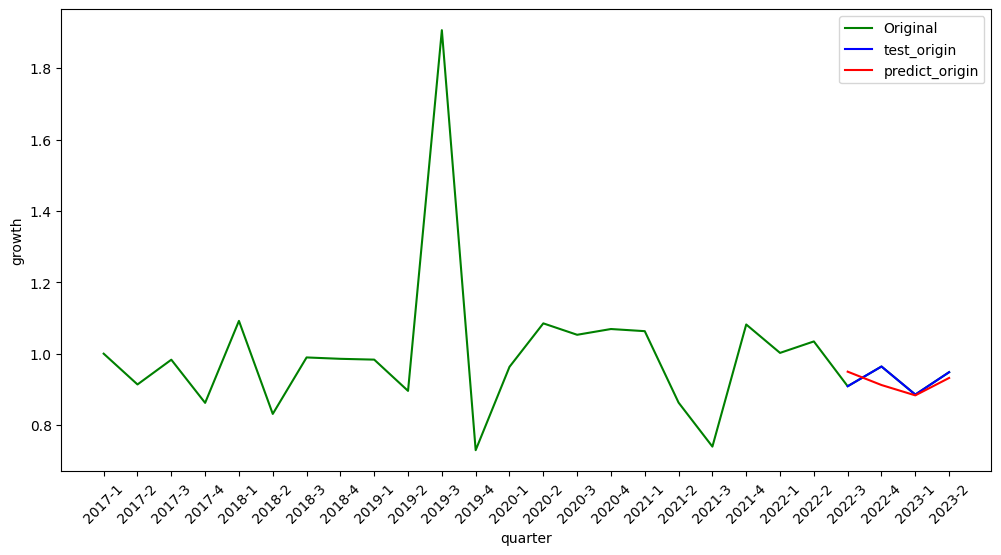

In [372]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [373]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.007351
std      0.038348
min     -0.040845
25%     -0.008566
50%      0.009174
75%      0.025091
max      0.051902
dtype: float64

In [374]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 26ms/step
[[0.16556208]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9244323968887329 


### 시장성

In [375]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_khosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.572797e+09  1.000000  0.000000
1   2.350860e+09  0.913737 -6.250000
2   2.311075e+09  0.983076  0.000000
3   1.992459e+09  0.862135  0.000000
4   2.175478e+09  1.091856 -3.225806
5   1.808211e+09  0.831179 -3.333333
6   1.789093e+09  0.989427 -3.448276
7   1.763287e+09  0.985576  0.000000
8   1.733838e+09  0.983299  0.000000
9   1.553059e+09  0.895734  0.000000
10  2.960781e+09  1.906419 -3.571429
11  2.160171e+09  0.729595  0.000000
12  2.080425e+09  0.963084  0.000000
13  2.257111e+09  1.084928  3.333333
14  2.376560e+09  1.052921  0.000000
15  2.540678e+09  1.069057  3.225806
16  2.700869e+09  1.063050  0.000000
17  2.330375e+09  0.862824  0.000000
18  1.723542e+09  0.739598  0.000000
19  1.864474e+09  1.081769  3.125000
20  1.868501e+09  1.002160  0.000000
21  1.932602e+09  1.034306  0.000000
22  1.756206e+09  0.908726 -6.666667
23  1.693034e+09  0.964029  0.000000
24  1.976557e+09  0.885373 -2.063641
25  2.120680e+09  0.948149 -1.985416
-

In [376]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [377]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.30083972 0.13237118 0.46030258]
 [0.40321983 0.18571506 0.46812504]]


In [378]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [379]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_55 (LSTM)              (None, 32)                12416     
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [380]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2388
Epoch 1: val_loss improved from inf to 0.19382, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2388 - val_loss: 0.1938
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2297
Epoch 2: val_loss improved from 0.19382 to 0.18367, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2297 - val_loss: 0.1837
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2210
Epoch 3: val_loss improved from 0.18367 to 0.17388, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2210 - val_loss: 0.1739
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2125
Epoch 4: val_loss improved from 0.17388 to 0.16442, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.2125 - val_loss: 0.1644
Epoch 5/100
1/1 [===============

In [381]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 847ms/step
[[0.33694008]
 [0.28409147]
 [0.22857471]
 [0.30894026]]


In [382]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.242831,0.336940
2022-4,0.231929,0.284091
2023-1,0.267358,0.228575
2023-2,0.325380,0.308940


In [383]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 5].values       # 시장성이 sin_khosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.242831,0.336940,-5.600556e+06,-2131581.50,-3.468974e+06
2022-4,0.231929,0.284091,-6.002388e+06,-4079639.25,-1.922749e+06
2023-1,0.267358,0.228575,-4.696470e+06,-6126048.00,1.429578e+06
2023-2,0.325380,0.308940,-2.557714e+06,-3163685.50,6.059712e+05


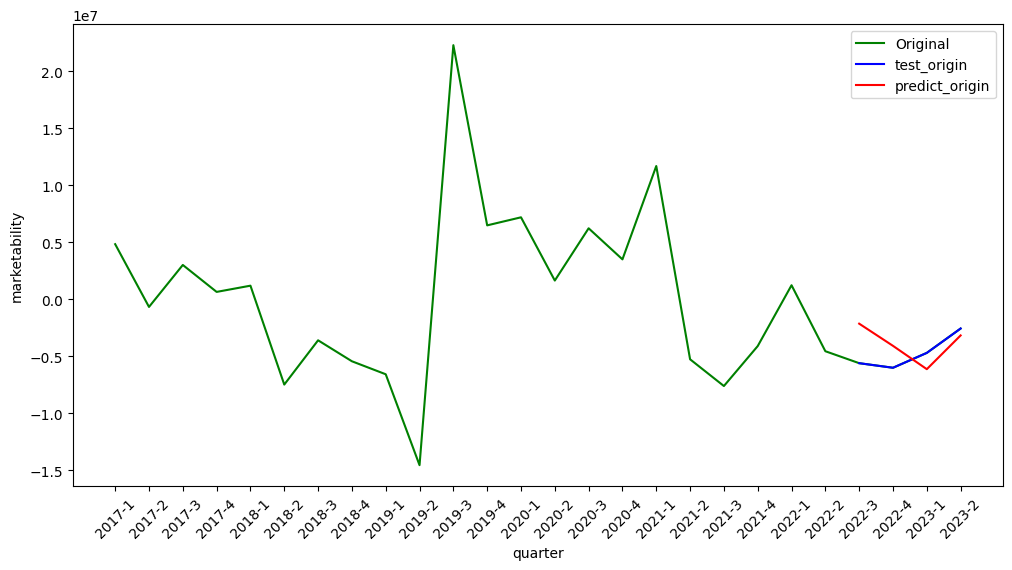

In [384]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [385]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -8.390435e+05
std      2.260211e+06
min     -3.468974e+06
25%     -2.309305e+06
50%     -6.583888e+05
75%      8.118728e+05
max      1.429578e+06
dtype: float64

In [386]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.299383]]
--------------------------------------------------------------------------------
예측된 시장성  : -3515976.25 


### 순점포증감률

In [387]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '성장성', '시장성']]
y = sin_khosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.572797e+09  1.000000  4.844182e+06
1   2.350860e+09  0.913737 -6.630143e+05
2   2.311075e+09  0.983076  3.020075e+06
3   1.992459e+09  0.862135  6.552046e+05
4   2.175478e+09  1.091856  1.201844e+06
5   1.808211e+09  0.831179 -7.478338e+06
6   1.789093e+09  0.989427 -3.592306e+06
7   1.763287e+09  0.985576 -5.432443e+06
8   1.733838e+09  0.983299 -6.572703e+06
9   1.553059e+09  0.895734 -1.455156e+07
10  2.960781e+09  1.906419  2.230954e+07
11  2.160171e+09  0.729595  6.495221e+06
12  2.080425e+09  0.963084  7.201903e+06
13  2.257111e+09  1.084928  1.651735e+06
14  2.376560e+09  1.052921  6.238210e+06
15  2.540678e+09  1.069057  3.511702e+06
16  2.700869e+09  1.063050  1.170237e+07
17  2.330375e+09  0.862824 -5.258843e+06
18  1.723542e+09  0.739598 -7.605671e+06
19  1.864474e+09  1.081769 -4.099311e+06
20  1.868501e+09  1.002160  1.240474e+06
21  1.932602e+09  1.034306 -4.550770e+06
22  1.756206e+09  0.908726 -5.600556e+06
23  1.693034e+09

In [388]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [389]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.30083972 0.13237118 0.26735754]
 [0.40321983 0.18571506 0.32537958]]


In [390]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [391]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_57 (LSTM)              (None, 32)                12416     
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [392]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3980
Epoch 1: val_loss improved from inf to 0.58495, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.3980 - val_loss: 0.5850
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3860
Epoch 2: val_loss improved from 0.58495 to 0.56958, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.3860 - val_loss: 0.5696
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3744
Epoch 3: val_loss improved from 0.56958 to 0.55449, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.3744 - val_loss: 0.5545
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3630
Epoch 4: val_loss improved from 0.55449 to 0.53961, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.3630 - val_loss: 0.5396
Epoch 5/100
1/1 [=================

In [393]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 837ms/step
[[0.5842273 ]
 [0.5308957 ]
 [0.48187092]
 [0.49502602]]


In [394]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.000000,0.584227
2022-4,0.666667,0.530896
2023-1,0.460303,0.481871
2023-2,0.468125,0.495026


In [395]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_khosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.000000,0.584227,-6.666667,-0.824393,-5.842273
2022-4,0.666667,0.530896,0.000000,-1.357710,1.357710
2023-1,0.460303,0.481871,-2.063641,-1.847957,-0.215683
2023-2,0.468125,0.495026,-1.985416,-1.716406,-0.269010


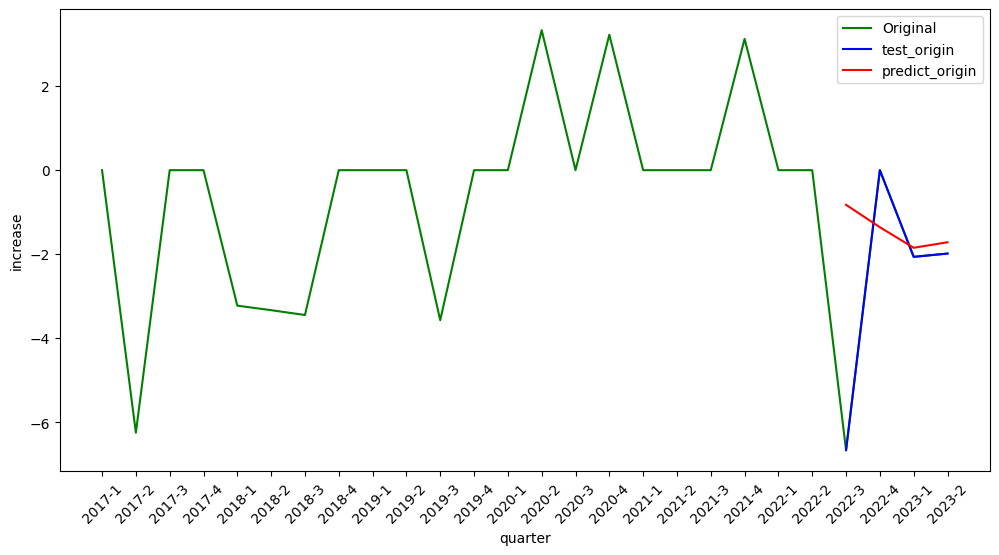

In [396]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [397]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.242314
std      3.158113
min     -5.842273
25%     -1.662326
50%     -0.242347
75%      0.177665
max      1.357710
dtype: float64

In [398]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.561834]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.048326849937439 


### 추가

In [399]:
sin_khosp.loc[26] = ['2023-3', '한의원', sales, growth, increase, marketability]

<ipython-input-399-c74f079c1855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_khosp.loc[26] = ['2023-3', '한의원', sales, growth, increase, marketability]


In [400]:
sin_khosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한의원,2.572797e+09,1.000000,0.000000,4.844182e+06
1,2017-2,한의원,2.350860e+09,0.913737,-6.250000,-6.630143e+05
2,2017-3,한의원,2.311075e+09,0.983076,0.000000,3.020075e+06
3,2017-4,한의원,1.992459e+09,0.862135,0.000000,6.552046e+05
4,2018-1,한의원,2.175478e+09,1.091856,-3.225806,1.201844e+06
5,2018-2,한의원,1.808211e+09,0.831179,-3.333333,-7.478338e+06
6,2018-3,한의원,1.789093e+09,0.989427,-3.448276,-3.592306e+06
7,2018-4,한의원,1.763287e+09,0.985576,0.000000,-5.432443e+06
8,2019-1,한의원,1.733838e+09,0.983299,0.000000,-6.572703e+06
9,2019-2,한의원,1.553059e+09,0.895734,0.000000,-1.455156e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [401]:
### X / y 데이터 생성
X = sin_khosp[['성장성', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  4.844182e+06  0.000000
1   0.913737 -6.630143e+05 -6.250000
2   0.983076  3.020075e+06  0.000000
3   0.862135  6.552046e+05  0.000000
4   1.091856  1.201844e+06 -3.225806
5   0.831179 -7.478338e+06 -3.333333
6   0.989427 -3.592306e+06 -3.448276
7   0.985576 -5.432443e+06  0.000000
8   0.983299 -6.572703e+06  0.000000
9   0.895734 -1.455156e+07  0.000000
10  1.906419  2.230954e+07 -3.571429
11  0.729595  6.495221e+06  0.000000
12  0.963084  7.201903e+06  0.000000
13  1.084928  1.651735e+06  3.333333
14  1.052921  6.238210e+06  0.000000
15  1.069057  3.511702e+06  3.225806
16  1.063050  1.170237e+07  0.000000
17  0.862824 -5.258843e+06  0.000000
18  0.739598 -7.605671e+06  0.000000
19  1.081769 -4.099311e+06  3.125000
20  1.002160  1.240474e+06  0.000000
21  1.034306 -4.550770e+06  0.000000
22  0.908726 -5.600556e+06 -6.666667
23  0.964029 -6.002388e+06  0.000000
24  0.885373 -4.696470e+06 -2.063641
25  0.948149 -2.557714e+06 -1.985416
2

In [402]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [403]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.18571506 0.32537958 0.46812504]
 [0.16556209 0.29938301 0.56183398]]


In [404]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [405]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_59 (LSTM)              (None, 32)                12416     
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [406]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2051
Epoch 1: val_loss improved from inf to 0.23617, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2051 - val_loss: 0.2362
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1970
Epoch 2: val_loss improved from 0.23617 to 0.22558, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1970 - val_loss: 0.2256
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1892
Epoch 3: val_loss improved from 0.22558 to 0.21534, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.1892 - val_loss: 0.2153
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1817
Epoch 4: val_loss improved from 0.21534 to 0.20541, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.1817 - val_loss: 0.2054
Epoch 5/100
1/1 [================

In [407]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 833ms/step
[[0.3244542 ]
 [0.26681578]
 [0.35749033]
 [0.3259595 ]]


In [408]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.099434,0.324454
2023-1,0.300840,0.266816
2023-2,0.403220,0.357490
2023-3,0.340320,0.325960


In [409]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_khosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.099434,0.324454,1.693034e+09,2.009800e+09,-316765898.0
2023-1,0.300840,0.266816,1.976557e+09,1.928661e+09,47896320.0
2023-2,0.403220,0.357490,2.120680e+09,2.056306e+09,64374528.0
2023-3,0.340320,0.325960,2.032135e+09,2.011919e+09,20216064.0


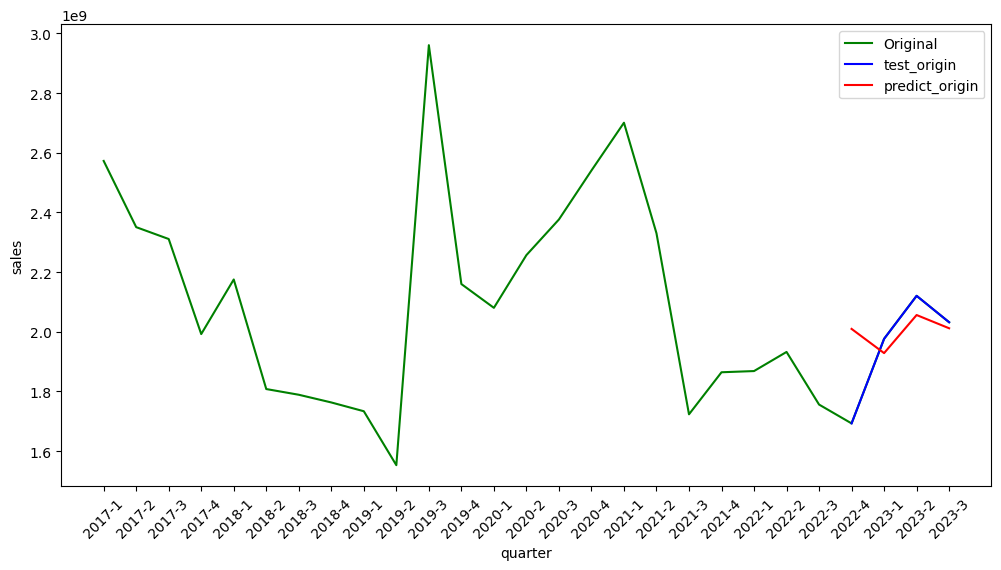

In [410]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [411]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -4.606975e+07
std      1.813815e+08
min     -3.167659e+08
25%     -6.402943e+07
50%      3.405619e+07
75%      5.201587e+07
max      6.437453e+07
dtype: float64

In [412]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.34106863]]
--------------------------------------------------------------------------------
예측된 매출  : 2033188352.0 


### 성장성

In [413]:
X = sin_khosp[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.572797e+09  4.844182e+06  0.000000
1   2.350860e+09 -6.630143e+05 -6.250000
2   2.311075e+09  3.020075e+06  0.000000
3   1.992459e+09  6.552046e+05  0.000000
4   2.175478e+09  1.201844e+06 -3.225806
5   1.808211e+09 -7.478338e+06 -3.333333
6   1.789093e+09 -3.592306e+06 -3.448276
7   1.763287e+09 -5.432443e+06  0.000000
8   1.733838e+09 -6.572703e+06  0.000000
9   1.553059e+09 -1.455156e+07  0.000000
10  2.960781e+09  2.230954e+07 -3.571429
11  2.160171e+09  6.495221e+06  0.000000
12  2.080425e+09  7.201903e+06  0.000000
13  2.257111e+09  1.651735e+06  3.333333
14  2.376560e+09  6.238210e+06  0.000000
15  2.540678e+09  3.511702e+06  3.225806
16  2.700869e+09  1.170237e+07  0.000000
17  2.330375e+09 -5.258843e+06  0.000000
18  1.723542e+09 -7.605671e+06  0.000000
19  1.864474e+09 -4.099311e+06  3.125000
20  1.868501e+09  1.240474e+06  0.000000
21  1.932602e+09 -4.550770e+06  0.000000
22  1.756206e+09 -5.600556e+06 -6.666667
23  1.693034e+09

In [414]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [415]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.40321983 0.32537958 0.46812504]
 [0.34032042 0.29938301 0.56183398]]


In [416]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [417]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_61 (LSTM)              (None, 32)                12416     
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [418]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1323
Epoch 1: val_loss improved from inf to 0.05986, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.1323 - val_loss: 0.0599
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1264
Epoch 2: val_loss improved from 0.05986 to 0.05415, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.1264 - val_loss: 0.0541
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1207
Epoch 3: val_loss improved from 0.05415 to 0.04880, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1207 - val_loss: 0.0488
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1154
Epoch 4: val_loss improved from 0.04880 to 0.04380, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1154 - val_loss: 0.0438
Epoch 5/100
1/1 [================

In [419]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 880ms/step
[[0.15510616]
 [0.13050744]
 [0.17198786]
 [0.16556206]]


In [420]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.199209,0.155106
2023-1,0.132371,0.130507
2023-2,0.185715,0.171988
2023-3,0.165562,0.165562


In [421]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 3].values       # 성장성이 sin_khosp의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.199209,0.155106,0.964029,0.912128,0.051902
2023-1,0.132371,0.130507,0.885373,0.883179,0.002193
2023-2,0.185715,0.171988,0.948149,0.931994,0.016154
2023-3,0.165562,0.165562,0.924432,0.924432,0.000000


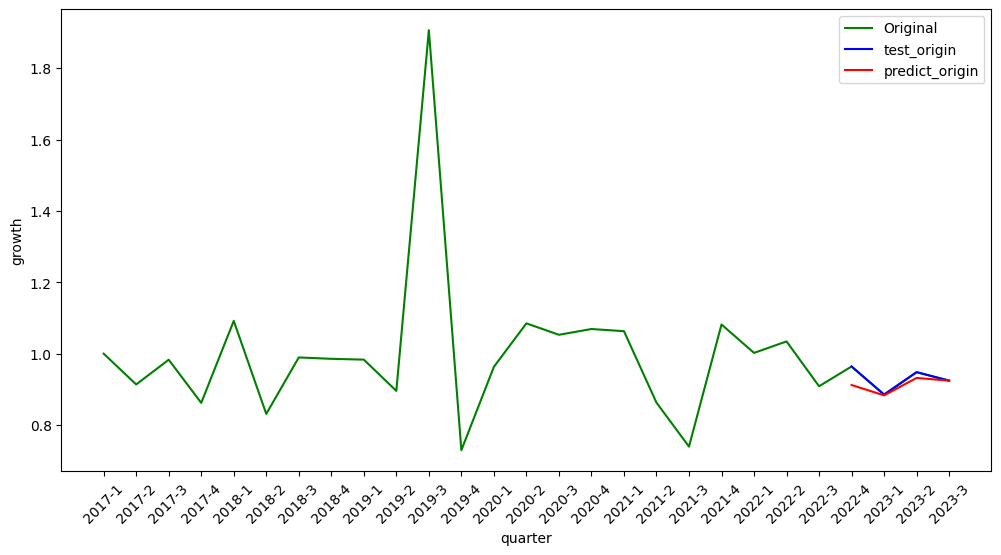

In [422]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [423]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.017562
std      0.023985
min      0.000000
25%      0.001645
50%      0.009174
75%      0.025091
max      0.051902
dtype: float64

In [424]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 25ms/step
[[0.17291977]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9330910444259644 


###시장성

In [425]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_khosp.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.572797e+09  1.000000  0.000000
1   2.350860e+09  0.913737 -6.250000
2   2.311075e+09  0.983076  0.000000
3   1.992459e+09  0.862135  0.000000
4   2.175478e+09  1.091856 -3.225806
5   1.808211e+09  0.831179 -3.333333
6   1.789093e+09  0.989427 -3.448276
7   1.763287e+09  0.985576  0.000000
8   1.733838e+09  0.983299  0.000000
9   1.553059e+09  0.895734  0.000000
10  2.960781e+09  1.906419 -3.571429
11  2.160171e+09  0.729595  0.000000
12  2.080425e+09  0.963084  0.000000
13  2.257111e+09  1.084928  3.333333
14  2.376560e+09  1.052921  0.000000
15  2.540678e+09  1.069057  3.225806
16  2.700869e+09  1.063050  0.000000
17  2.330375e+09  0.862824  0.000000
18  1.723542e+09  0.739598  0.000000
19  1.864474e+09  1.081769  3.125000
20  1.868501e+09  1.002160  0.000000
21  1.932602e+09  1.034306  0.000000
22  1.756206e+09  0.908726 -6.666667
23  1.693034e+09  0.964029  0.000000
24  1.976557e+09  0.885373 -2.063641
25  2.120680e+09  0.948149 -1.985416
2

In [426]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [427]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.40321983 0.18571506 0.46812504]
 [0.34032042 0.16556209 0.56183398]]


In [428]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [429]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_63 (LSTM)              (None, 32)                12416     
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [430]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2388
Epoch 1: val_loss improved from inf to 0.17922, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2388 - val_loss: 0.1792
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2297
Epoch 2: val_loss improved from 0.17922 to 0.16959, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2297 - val_loss: 0.1696
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2210
Epoch 3: val_loss improved from 0.16959 to 0.16032, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2210 - val_loss: 0.1603
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2125
Epoch 4: val_loss improved from 0.16032 to 0.15136, saving model to stock_model.h5
1/1 [==============================] - 0s 116ms/step - loss: 0.2125 - val_loss: 0.1514
Epoch 5/100
1/1 [================

In [431]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 841ms/step
[[0.28409147]
 [0.22857471]
 [0.30894026]
 [0.299383  ]]


In [432]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.231929,0.284091
2023-1,0.267358,0.228575
2023-2,0.325380,0.308940
2023-3,0.299383,0.299383


In [433]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 5].values       # 시장성이 sin_khosp의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.231929,0.284091,-6.002388e+06,-4079639.25,-1.922749e+06
2023-1,0.267358,0.228575,-4.696470e+06,-6126048.00,1.429578e+06
2023-2,0.325380,0.308940,-2.557714e+06,-3163685.50,6.059712e+05
2023-3,0.299383,0.299383,-3.515976e+06,-3515976.25,0.000000e+00


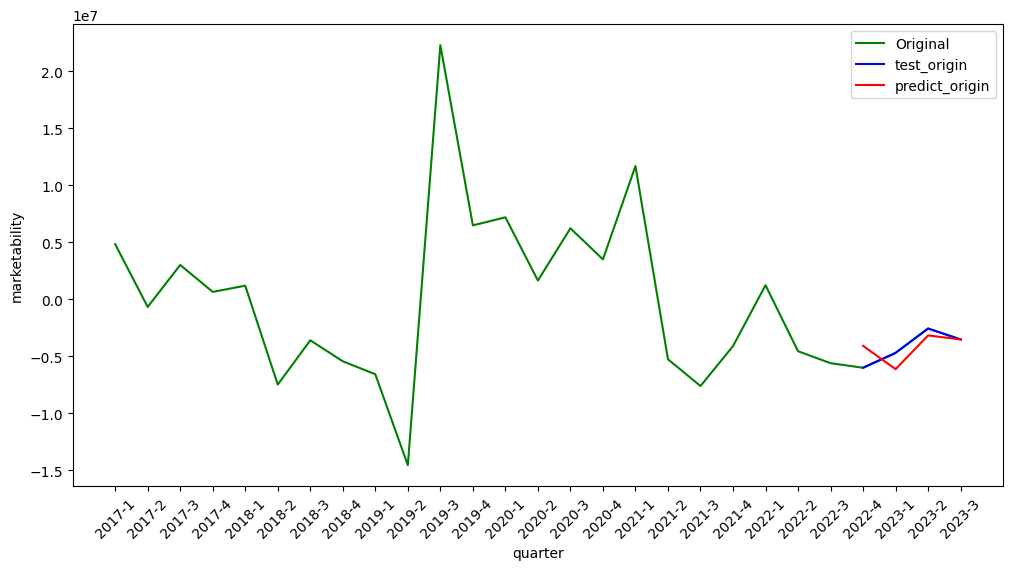

In [434]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [435]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.819999e+04
std      1.426496e+06
min     -1.922749e+06
25%     -4.806872e+05
50%      3.029856e+05
75%      8.118728e+05
max      1.429578e+06
dtype: float64

In [436]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 29ms/step
[[0.31462964]]
--------------------------------------------------------------------------------
예측된 시장성  : -2953968.75 


### 순점포증감률

In [437]:
### X / y 데이터 생성
X = sin_khosp[['분기당_매출_금액', '성장성', '시장성']]
y = sin_khosp.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.572797e+09  1.000000  4.844182e+06
1   2.350860e+09  0.913737 -6.630143e+05
2   2.311075e+09  0.983076  3.020075e+06
3   1.992459e+09  0.862135  6.552046e+05
4   2.175478e+09  1.091856  1.201844e+06
5   1.808211e+09  0.831179 -7.478338e+06
6   1.789093e+09  0.989427 -3.592306e+06
7   1.763287e+09  0.985576 -5.432443e+06
8   1.733838e+09  0.983299 -6.572703e+06
9   1.553059e+09  0.895734 -1.455156e+07
10  2.960781e+09  1.906419  2.230954e+07
11  2.160171e+09  0.729595  6.495221e+06
12  2.080425e+09  0.963084  7.201903e+06
13  2.257111e+09  1.084928  1.651735e+06
14  2.376560e+09  1.052921  6.238210e+06
15  2.540678e+09  1.069057  3.511702e+06
16  2.700869e+09  1.063050  1.170237e+07
17  2.330375e+09  0.862824 -5.258843e+06
18  1.723542e+09  0.739598 -7.605671e+06
19  1.864474e+09  1.081769 -4.099311e+06
20  1.868501e+09  1.002160  1.240474e+06
21  1.932602e+09  1.034306 -4.550770e+06
22  1.756206e+09  0.908726 -5.600556e+06
23  1.693034e+09

In [438]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [439]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.40321983 0.18571506 0.32537958]
 [0.34032042 0.16556209 0.29938301]]


In [440]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [441]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_65 (LSTM)              (None, 32)                12416     
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [442]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3980
Epoch 1: val_loss improved from inf to 0.51996, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.3980 - val_loss: 0.5200
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3860
Epoch 2: val_loss improved from 0.51996 to 0.50630, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.3860 - val_loss: 0.5063
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3744
Epoch 3: val_loss improved from 0.50630 to 0.49289, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.3744 - val_loss: 0.4929
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3630
Epoch 4: val_loss improved from 0.49289 to 0.47970, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.3630 - val_loss: 0.4797
Epoch 5/100
1/1 [===============

In [443]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 905ms/step
[[0.49699736]
 [0.44878864]
 [0.4617979 ]
 [0.52682424]]


In [444]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.666667,0.496997
2023-1,0.460303,0.448789
2023-2,0.468125,0.461798
2023-3,0.561834,0.526824


In [445]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_khosp의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.666667,0.496997,0.000000,-1.696693,1.696693
2023-1,0.460303,0.448789,-2.063641,-2.178780,0.115139
2023-2,0.468125,0.461798,-1.985416,-2.048688,0.063271
2023-3,0.561834,0.526824,-1.048327,-1.398424,0.350098


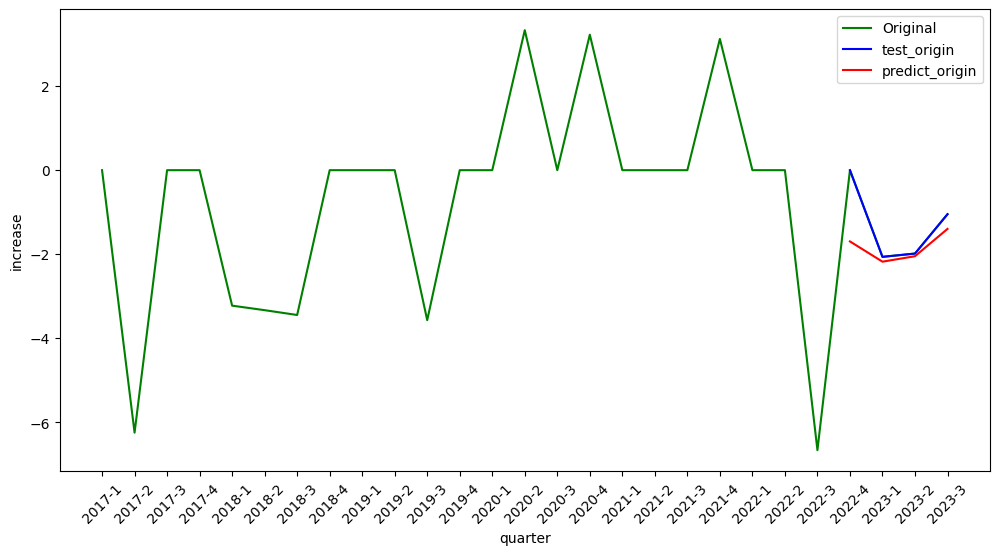

In [446]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [447]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.556300
std      0.770436
min      0.063271
25%      0.102172
50%      0.232619
75%      0.686746
max      1.696693
dtype: float64

In [448]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 30ms/step
[[0.5596253]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.07041335105896 


### 추가

In [449]:
sin_khosp.loc[27] = ['2023-4', '한의원', sales, growth, increase, marketability]

<ipython-input-449-f3fcf9cff762>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_khosp.loc[27] = ['2023-4', '한의원', sales, growth, increase, marketability]


In [450]:
final_sin_khosp = sin_khosp
final_sin_khosp

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한의원,2.572797e+09,1.000000,0.000000,4.844182e+06
1,2017-2,한의원,2.350860e+09,0.913737,-6.250000,-6.630143e+05
2,2017-3,한의원,2.311075e+09,0.983076,0.000000,3.020075e+06
3,2017-4,한의원,1.992459e+09,0.862135,0.000000,6.552046e+05
4,2018-1,한의원,2.175478e+09,1.091856,-3.225806,1.201844e+06
5,2018-2,한의원,1.808211e+09,0.831179,-3.333333,-7.478338e+06
6,2018-3,한의원,1.789093e+09,0.989427,-3.448276,-3.592306e+06
7,2018-4,한의원,1.763287e+09,0.985576,0.000000,-5.432443e+06
8,2019-1,한의원,1.733838e+09,0.983299,0.000000,-6.572703e+06
9,2019-2,한의원,1.553059e+09,0.895734,0.000000,-1.455156e+07


## 최종결과

In [451]:
### X / y 데이터 생성
X = sin_khosp[['성장성', '시장성', '순점포증감률']]
y = sin_khosp.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  4.844182e+06  0.000000
1   0.913737 -6.630143e+05 -6.250000
2   0.983076  3.020075e+06  0.000000
3   0.862135  6.552046e+05  0.000000
4   1.091856  1.201844e+06 -3.225806
5   0.831179 -7.478338e+06 -3.333333
6   0.989427 -3.592306e+06 -3.448276
7   0.985576 -5.432443e+06  0.000000
8   0.983299 -6.572703e+06  0.000000
9   0.895734 -1.455156e+07  0.000000
10  1.906419  2.230954e+07 -3.571429
11  0.729595  6.495221e+06  0.000000
12  0.963084  7.201903e+06  0.000000
13  1.084928  1.651735e+06  3.333333
14  1.052921  6.238210e+06  0.000000
15  1.069057  3.511702e+06  3.225806
16  1.063050  1.170237e+07  0.000000
17  0.862824 -5.258843e+06  0.000000
18  0.739598 -7.605671e+06  0.000000
19  1.081769 -4.099311e+06  3.125000
20  1.002160  1.240474e+06  0.000000
21  1.034306 -4.550770e+06  0.000000
22  0.908726 -5.600556e+06 -6.666667
23  0.964029 -6.002388e+06  0.000000
24  0.885373 -4.696470e+06 -2.063641
25  0.948149 -2.557714e+06 -1.985416
2

In [452]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [453]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.16556209 0.29938301 0.56183398]
 [0.17291973 0.31462964 0.55962533]]


In [454]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [455]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_67 (LSTM)              (None, 32)                12416     
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [456]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2184
Epoch 1: val_loss improved from inf to 0.19715, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2184 - val_loss: 0.1972
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2097
Epoch 2: val_loss improved from 0.19715 to 0.18805, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2097 - val_loss: 0.1880
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2013
Epoch 3: val_loss improved from 0.18805 to 0.17927, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2013 - val_loss: 0.1793
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1932
Epoch 4: val_loss improved from 0.17927 to 0.17078, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.1932 - val_loss: 0.1708
Epoch 5/100
1/1 [================

In [457]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 858ms/step
[[0.24474205]
 [0.32608432]
 [0.29778737]
 [0.3113796 ]]


In [458]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_khosp.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.300840,0.244742
2023-2,0.403220,0.326084
2023-3,0.340320,0.297787
2023-4,0.341069,0.311380


In [459]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_khosp.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_khosp의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.300840,0.244742,1.976557e+09,1.897587e+09,78969984.0
2023-2,0.403220,0.326084,2.120680e+09,2.012095e+09,108585344.0
2023-3,0.340320,0.297787,2.032135e+09,1.972260e+09,59874688.0
2023-4,0.341069,0.311380,2.033188e+09,1.991395e+09,41793792.0


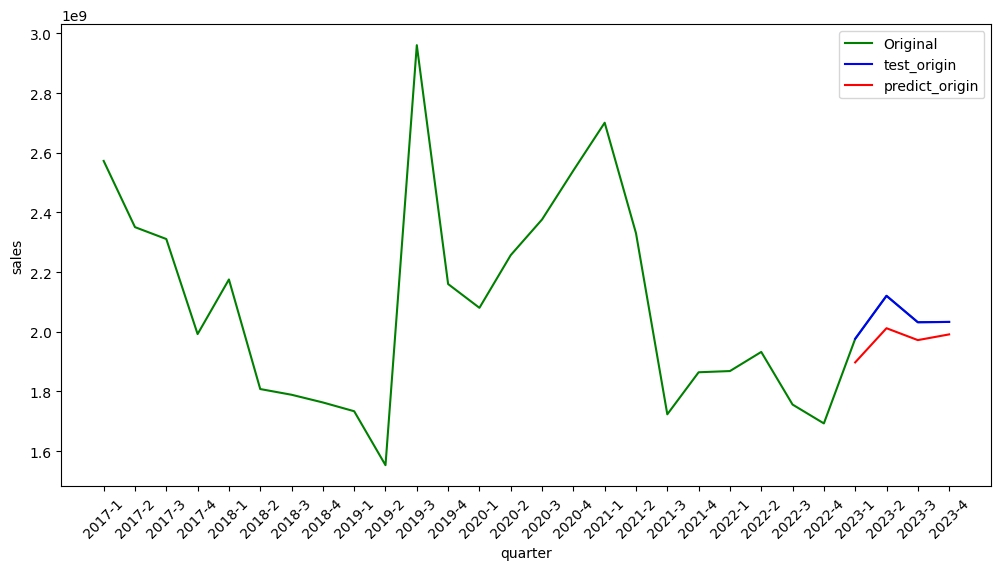

In [460]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_khosp['분기'], sin_khosp['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()